# Pupillometry example data

This notebook shows how to generate the figures with pupil-size data during an auditory working-memory task from:

- Mathôt, S. (in prep). Pupillometry: Psychology, Physiology, and Function. *Journal of Cognition*


## Loading the data

First, we define the parser:

In [1]:
from datamatrix import operations as ops, functional as fnc, series as srs
from eyelinkparser import parse, defaulttraceprocessor


@fnc.memoize(persistent=True)
def get_data():
    
    dm = parse(
        traceprocessor=defaulttraceprocessor(blinkreconstruct=True)
    )
    dm = ops.keep_only(
        dm, dm.set_size, dm.correct, dm.ptrace_sounds,
        dm.ptrace_retention, dm.ptrace_response
    )
    return dm

Initializing cache ...


And then we parse:

In [2]:
get_data.clear()
dm = get_data()


@cached: calling <function parse at 0x7f927cf1c510>
/tmp/tmpawm.edf.asc
Parsing /tmp/tmpawm.edf.asc ...........

/home/sebastiaan/python-libs/datamatrix/series.py:925: RuntimeWarning: invalid value encountered in less
  l = np.where(vtrace[ifrom:] < -vt)[0]
/home/sebastiaan/python-libs/datamatrix/series.py:933: RuntimeWarning: invalid value encountered in greater
  l = np.where(vtrace[istart:] > vt)[0]
/home/sebastiaan/python-libs/datamatrix/series.py:940: RuntimeWarning: invalid value encountered in less
  l = np.where(vtrace[imid:] < 0)[0]
/home/sebastiaan/python-libs/datamatrix/series.py:983: RuntimeWarning: invalid value encountered in less
  | np.isnan(a) )[0]
/home/sebastiaan/python-libs/datamatrix/series.py:983: RuntimeWarning: invalid value encountered in greater
  | np.isnan(a) )[0]


................................................................ (75 trials)


Finally, we plot the data.

/home/sebastiaan/python-libs/datamatrix/_datamatrix/_seriescolumn.py:124: RuntimeWarning: Mean of empty slice
  return nanmean(self._seq, axis=0)
/home/sebastiaan/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


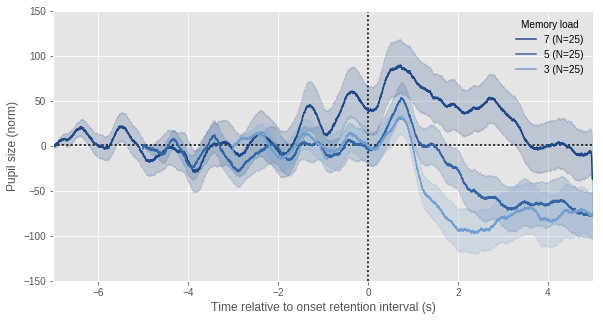

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from datamatrix import plot
from datamatrix.colors.tango import blue

dm.pupil = srs.concatenate(
    srs.endlock(dm.ptrace_sounds),
    dm.ptrace_retention
)
dm.pupil = srs.baseline(
    dm.pupil,
    dm.ptrace_sounds,
    10, 20,
    method='subtractive'
)
dm.pupil.depth = 12000
X = np.linspace(-7, 5, 12000)
dm3, dm5, dm7 = ops.split(dm.set_size, 3, 5, 7)

plot.new(size=(10, 5))
plt.xlim(-7, 5)
plt.ylim(-150, 150)
plt.axvline(0, linestyle=':', color='black')
plt.axhline(1, linestyle=':', color='black')
plot.trace(dm7.pupil, x=X, color=blue[2], label='7 (N=%d)' % len(dm7))
plot.trace(dm5.pupil, x=X, color=blue[1], label='5 (N=%d)' % len(dm5))
plot.trace(dm3.pupil, x=X, color=blue[0], label='3 (N=%d)' % len(dm3))
plt.ylabel('Pupil size (norm)')
plt.xlabel('Time relative to onset retention interval (s)')
plt.legend(frameon=False, title='Memory load')
plt.savefig('memory.svg')
plt.show()